In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json, pycountry, datetime
from matplotlib import style

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500).tolist()
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500).tolist()
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Capitalize city names
cities = [city.title() for city in cities]

len(cities)

643

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Create empty lists
windspeed = []
tempmax = []
humidity = []
latitude = []
longitude = []
date = []
cloudiness = []
citynames = []
countrynames = []

print("Beginning Data Retrieval")
print("-----------------------------")

count = 1
setnum = 1

# Request 
for cityname in cities:
    url = base_url + "&q=" + cityname
    respond = requests.get(url)
   
    response = respond.json()
    
    print(f"Processing Record {count} of Set {setnum} | {cityname}")
    count += 1
  
    try: 
        windspeed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        tempmax.append(response["main"]["temp_max"])
        
        citynames.append(cityname)
        country = pycountry.countries.get(alpha_2=response["sys"]["country"])
        countrynames.append(country.name)
        print(respond.url)
        
    except KeyError:
        print("**KeyError: City not found. Skip to next city**")  
    
    if count % 51 == 0:
        count = 1
        setnum += 1

# If the list doesn't have 500 cities, create latitudes and longitudes until there is 500 cities
if len(citynames) <= 500:
    while len(citynames) <= 500:
        lat = np.random.uniform(low=-90.000, high=90.000)
        lng = np.random.uniform(low=-180.000, high=180.000)
        
        city = citipy.nearest_city(lat, lat).city_name.title()
        if city not in cities:
            url = base_url + "&q=" + city
            respond = requests.get(url)
   
            response = respond.json()
    
            print(f"Processing Record {count} of Set {setnum} | {cityname}")
            count += 1
  
            try: 
                windspeed.append(response["wind"]["speed"])
                humidity.append(response["main"]["humidity"])
                latitude.append(response["coord"]["lat"])
                longitude.append(response["coord"]["lon"])
                date.append(response["dt"])
                cloudiness.append(response["clouds"]["all"])
                tempmax.append(response["main"]["temp_max"])
        
                citynames.append(city)
                country = pycountry.countries.get(alpha_2=response["sys"]["country"])
                countrynames.append(country.name)
                print(respond.url)
        
            except KeyError:
                print("**KeyError: City not found. Skip to next city**") 
            except:
                print("**General Error: Skip to next city**")
    
            if count % 51 == 0:
                count = 1
                setnum += 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Kloulklubed
Processing Record 2 of Set 1 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Komsomolskiy
Processing Record 3 of Set 1 | Arraial Do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Arraial%20Do%20Cabo
Processing Record 4 of Set 1 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tessalit
Processing Record 5 of Set 1 | Amderma
**KeyError: City not found. Skip to next city**
Processing Record 6 of Set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Vaini
Processing Record 7 of Set 1 | Ishigaki
http://api.openweathermap.org/da

Processing Record 7 of Set 2 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Butaritari
Processing Record 8 of Set 2 | Odweyne
**KeyError: City not found. Skip to next city**
Processing Record 9 of Set 2 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Faanui
Processing Record 10 of Set 2 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Hithadhoo
Processing Record 11 of Set 2 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Deputatskiy
Processing Record 12 of Set 2 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Victoria
Processing Record 13 of Set 2 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd

Processing Record 16 of Set 3 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Bethel
Processing Record 17 of Set 3 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Khatanga
Processing Record 18 of Set 3 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Port%20Alfred
Processing Record 19 of Set 3 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Iqaluit
Processing Record 20 of Set 3 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Fortuna
Processing Record 21 of Set 3 | Plerin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Plerin
Processing Record 22 of Set 3 | Cuxhaven
http://api.openweathermap.org/data/2.5/weathe

Processing Record 22 of Set 4 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Biak
Processing Record 23 of Set 4 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Lebu
Processing Record 24 of Set 4 | Nizhneyansk
**KeyError: City not found. Skip to next city**
Processing Record 25 of Set 4 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Luderitz
Processing Record 26 of Set 4 | Victoria Point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Victoria%20Point
Processing Record 27 of Set 4 | Yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Yenagoa
Processing Record 28 of Set 4 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Eg

Processing Record 29 of Set 5 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Port%20Lincoln
Processing Record 30 of Set 5 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Katobu
Processing Record 31 of Set 5 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Fare
Processing Record 32 of Set 5 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Severo-Kurilsk
Processing Record 33 of Set 5 | Puerto Del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Puerto%20Del%20Rosario
Processing Record 34 of Set 5 | Nageshwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Nageshwari
Processing Record 35 of Set 5 | Kushima
http

Processing Record 36 of Set 6 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Mount%20Isa
Processing Record 37 of Set 6 | Muzhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Muzhi
Processing Record 38 of Set 6 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Imbituba
Processing Record 39 of Set 6 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Avera
Processing Record 40 of Set 6 | Bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Bulgan
Processing Record 41 of Set 6 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Saint-Joseph
Processing Record 42 of Set 6 | Narsaq
http://api.openweathermap.org/data/2.5/weather?

Processing Record 44 of Set 7 | Lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Lethem
Processing Record 45 of Set 7 | Nerang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Nerang
Processing Record 46 of Set 7 | Tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tiarei
Processing Record 47 of Set 7 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Hasaki
Processing Record 48 of Set 7 | Kortkeros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Kortkeros
Processing Record 49 of Set 7 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Hofn
Processing Record 50 of Set 7 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 1 of Set 9 | Jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Jasper
Processing Record 2 of Set 9 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Yar-Sale
Processing Record 3 of Set 9 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Husavik
Processing Record 4 of Set 9 | Quimper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Quimper
Processing Record 5 of Set 9 | Gairo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Gairo
Processing Record 6 of Set 9 | Ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Ulaangom
Processing Record 7 of Set 9 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 7 of Set 10 | Igrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Igrim
Processing Record 8 of Set 10 | Macapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Macapa
Processing Record 9 of Set 10 | Bengkalis
**KeyError: City not found. Skip to next city**
Processing Record 10 of Set 10 | San Rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=San%20Rafael
Processing Record 11 of Set 10 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Alofi
Processing Record 12 of Set 10 | Saltillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Saltillo
Processing Record 13 of Set 10 | Margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Margate


Processing Record 14 of Set 11 | Donghai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Donghai
Processing Record 15 of Set 11 | Marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Marshall
Processing Record 16 of Set 11 | Laramie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Laramie
Processing Record 17 of Set 11 | Vakhrushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Vakhrushi
Processing Record 18 of Set 11 | Esmeralda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Esmeralda
Processing Record 19 of Set 11 | Maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Maragogi
Processing Record 20 of Set 11 | Richards Bay
http://api.openweathermap.org/

Processing Record 22 of Set 12 | Gaoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Gaoua
Processing Record 23 of Set 12 | Sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Sechura
Processing Record 24 of Set 12 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Mecca
Processing Record 25 of Set 12 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Touros
Processing Record 26 of Set 12 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Bilma
Processing Record 27 of Set 12 | Tolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tolga
Processing Record 28 of Set 12 | Malartic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 30 of Set 13 | Karatau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Karatau
Processing Record 31 of Set 13 | Tahe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Tahe
Processing Record 32 of Set 13 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Kavaratti
Processing Record 33 of Set 13 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Berlevag
Processing Record 34 of Set 13 | Cabinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Cabinda
Processing Record 35 of Set 13 | Valleyview
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c37d529ea977447967d5a04d599554cd&q=Valleyview
Processing Record 36 of Set 13 | Pahrump
http://api.openweathermap.org/data/2.5/we

In [5]:
cities_df = pd.DataFrame({"City":citynames, "Country":countrynames, "Lat":latitude,"Lng": longitude, 
                          "Date":date, "Max Temp":tempmax,"Humidity":humidity, "Wind Speed":windspeed, 
                          "Cloudiness":cloudiness})

cities_df.count()

City          560
Country       560
Lat           560
Lng           560
Date          560
Max Temp      560
Humidity      560
Wind Speed    560
Cloudiness    560
dtype: int64

In [6]:
cities_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,Kloulklubed,Palau,7.04,134.26,1530996720,82.40,83,4.70,90
1,Komsomolskiy,Russian Federation,67.55,63.78,1530998759,55.21,56,16.24,88
2,Arraial Do Cabo,Brazil,-22.97,-42.02,1530997200,73.40,78,16.11,0
3,Tessalit,Mali,20.20,1.01,1530998759,81.67,10,7.63,0
4,Vaini,India,15.34,74.49,1530998759,67.81,99,4.27,92


In [7]:
date = max(cities_df["Date"])

converted_date = datetime.datetime.fromtimestamp(date).strftime('%m/%d/%Y')

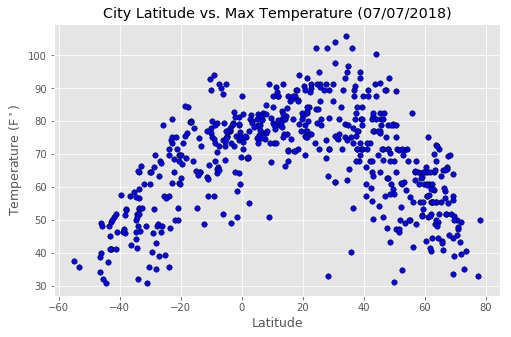

In [8]:
style.use('ggplot')

plt.figure(figsize=(8, 5))
plt.scatter(latitude, tempmax, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Temperature (F$^\circ$)", size = 12.5)
plt.title(f"City Latitude vs. Max Temperature ({converted_date})")
plt.savefig("images/Latitude_Temp.png")
plt.show()

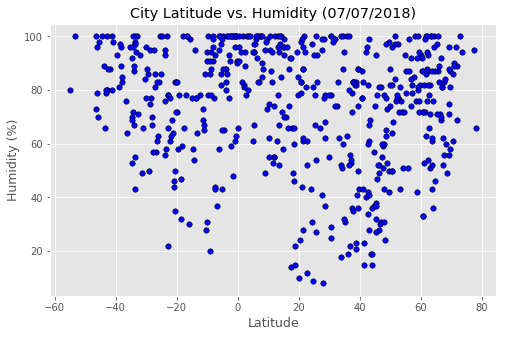

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, humidity, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Humidity (%)", size = 12.5)
plt.title(f"City Latitude vs. Humidity ({converted_date})")
plt.savefig("images/Latitude_Humidity.png")
plt.show()

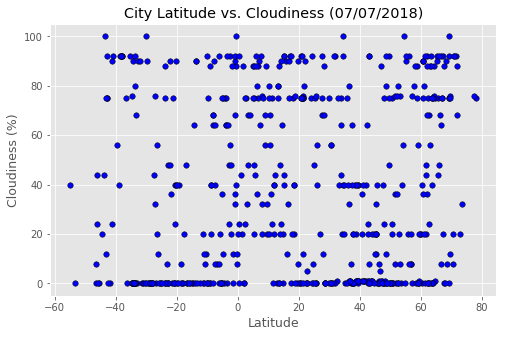

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, cloudiness, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Cloudiness (%)", size = 12.5)
plt.title(f"City Latitude vs. Cloudiness ({converted_date})")
plt.savefig("images/Latitude_Cloudiness.png")
plt.show()

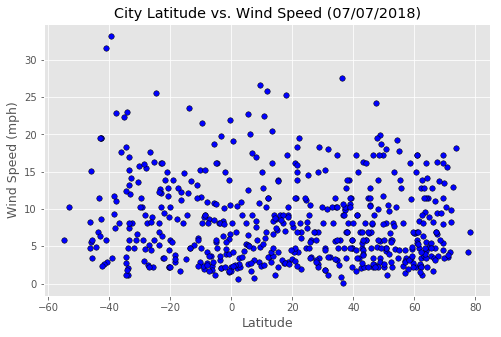

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(latitude, windspeed, s = 30, color = "blue", edgecolors='black')

plt.xlabel("Latitude", size = 12.5)
plt.ylabel("Wind Speed (mph)", size = 12.5)
plt.title(f"City Latitude vs. Wind Speed ({converted_date})")
plt.savefig("images/Latitude_Windspeed.png")
plt.show()